# PROBLEM STATEMENT

This assignment requires that you to find at least two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of economic activity or measures (see below) for the region of Ann Arbor, Michigan, United States, or United States more broadly.

Here are the assignment instructions:

* State the region and the domain category that your data sets are about (e.g., Ann Arbor, Michigan, United States and economic activity or measures).

* You must state a question about the domain category and region that you identified as being interesting.

* You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.

* You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.

* You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.
What do we mean by economic activity or measures? For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Research Question

### How has the unemployment rate of *Ann Arbor, Michigan, United States* changed related to the overall unemployment rate of the state of Michigan for the 20-year period of 1999-2019?

Data for Ann Arbor, Michigan was downloaded from the US BUREAU OF LABOR STATISTICS

https://www.bls.gov/

The specific page for Ann Arbor, Michigan, is:

https://www.bls.gov/eag/eag.mi_annarbor_msa.htm#eag_mi_annarbor_msa.f.2

The specific page for the state of Michigan, is:

https://www.bls.gov/regions/midwest/michigan.htm#eag

The settings used to generate and then download each files are as follows:
1. FROM 1999 to 2019
2. Using only information for the Month of January. 
    * Because Ann Arbors data is not seasonally adjusted

# IMPORTANT NOTE
    ## The files were converted manually to CSV prior to processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# uploading DFs
    ## setting correct delimiter ;
    ## starting at row 10
    ## setting the year as the index
    ## keeping only the relevant columns
michigan_df = pd.read_csv("data/Michigan.csv", delimiter=";", header=10, index_col=0, usecols=[0,1])
    ## renaming column for actual understanding
michigan_df.rename(columns={"Jan": "Michigan_Jan-Unemployment"}, inplace=True)

# reproducing same operations in ann_arbor DF
ann_df = pd.read_csv("data/Ann Arbor, Michigan.csv", delimiter=";", header=10, index_col=0, usecols=[0,1])
## renaming column for actual understanding
ann_df.rename(columns={"Jan": "AnnArbor_Jan-Unemployment"}, inplace=True)


In [3]:
# merging both dataframes into a single one for easier processing
joint_df = pd.merge(michigan_df, ann_df, how="inner", on="Year")

In [4]:
# setting a decent looking style
plt.style.use("fivethirtyeight")

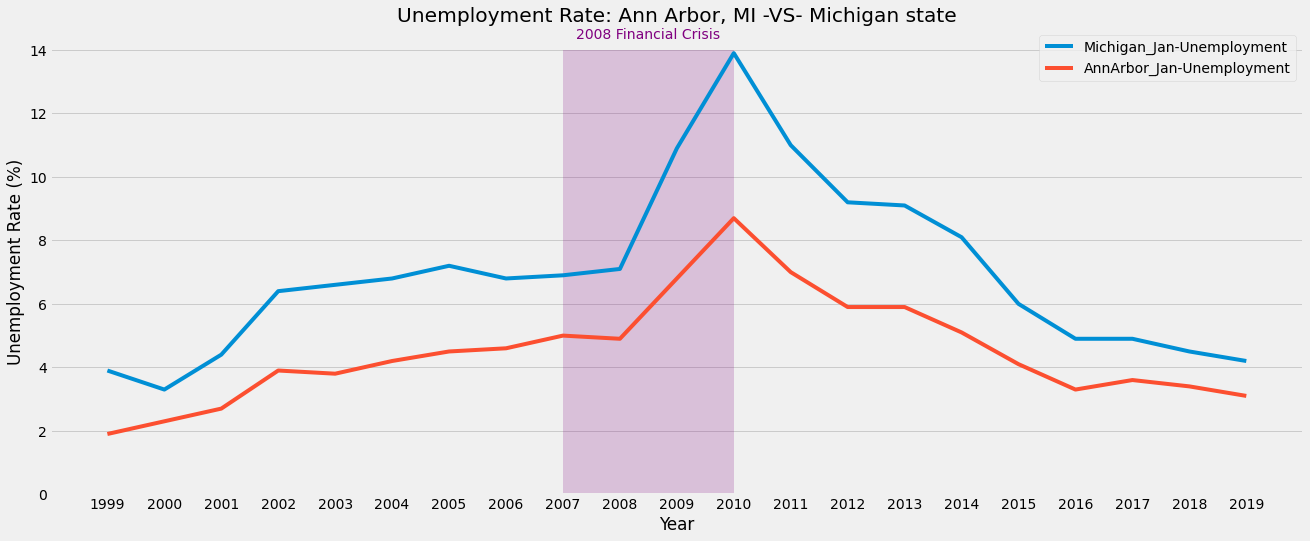

In [37]:
# assigning plot generation to convenient variable
ax = joint_df.plot(figsize=(20,8), ylabel="Unemployment Rate (%)", xticks=list(joint_df.index), grid=False, title="Unemployment Rate: Ann Arbor, MI -VS- Michigan state")
# setting yaxis grids for easier value visualization
ax.yaxis.grid(True)

# plotting bars for 2008 crisis
    ## use x period of May 2007 to May 2009
    ## using a Y placeholder value of 14
plt.bar([2007.5,2008.5,2009.5],[14]*3, width=1, alpha=0.2, color="purple")
    ## addding relevant text 
plt.text(x=2008.5, y=14.5, s="2008 Financial Crisis", horizontalalignment="center", verticalalignment='center', color="purple")

plt.savefig("Assigntment4.jpg")